In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

## Problem 2: predicting New York City energy production

**Part 1:** Follow the [instruction I](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%201.docx?raw=true) and [instruction II](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%202.docx?raw=true) documents to download the weather and energy production datasets. 
Then, run the cell below.

In [3]:
# load weather data
path = '../../../Data/weather_NYC.csv' 
data = pd.read_csv(path,index_col='DATE',parse_dates=True)

# load energy consumption datasets
df_list = []
file_paths = ['../../../Data/load_NYC_2018.csv', '../../../Data/load_NYC_2019.csv']
for file in file_paths:
    df = pd.read_csv(file, 
                     usecols = ['RTD End Time Stamp','RTD Actual Load'], 
                     index_col='RTD End Time Stamp', 
                     parse_dates=True)
    df_list.append(df) 
data['LOAD'] = pd.concat(df_list).resample('d').mean() # average energy production
data.head()

,STATION,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,LOAD
DATE,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,17.67,NaN,0.00,0.0,0.0,12,18,7,310,310.0,29.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1719.182034
2018-01-02,USW00094789,15.66,NaN,0.00,0.0,0.0,18,26,13,260,270.0,23.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.714815
2018-01-03,USW00094789,8.28,NaN,0.00,0.0,0.0,21,28,12,260,270.0,19.9,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699.275172
2018-01-04,USW00094789,28.19,NaN,0.49,8.0,1.2,25,29,19,340,330.0,44.1,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1722.843750
2018-01-05,USW00094789,25.05,NaN,0.00,0.0,7.9,15,19,9,290,290.0,36.0,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1773.566997


**Column descriptions:**

| column | description |
| :-- | --: |
| AWND | Average wind speed |
| PGTM | Peak gust time |
| PRCP | Precipitation |
| SNOW | Snowfall |
| SNWD | Snow depth |
| TAVG | Average Temperature |
| TMAX | Maximum temperature |
| TMIN | Minimum temperature |
| WDF2 | Direction of fastest 2-minute wind |
| WDF5 | Direction of fastest 5-second wind |
| WSF2 | Fastest 2-minute wind speed |
| WSF5 | Fastest 5-second wind speed |
| WT01 | Fog, ice fog, or freezing fog (may include heavy fog) |
| WT02 | Heavy fog or heaving freezing fog (not always distinguished from fog) |
| WT03 | Thunder |
| WT04 | Ice pellets, sleet, snow pellets, or small hail |
| WT05 | Hail (may include small hail) |
| WT06 | Glaze or rime |
| WT08 | Smoke or haze |
| WT09 | Blowing or drifting snow | 
| LOAD (**target vector**) | average electricity produced (in Watts) in the CAPITAL zone (see the picture below) |

![zones](nyc_zones.png)

Text(0.5, 0, 'date')

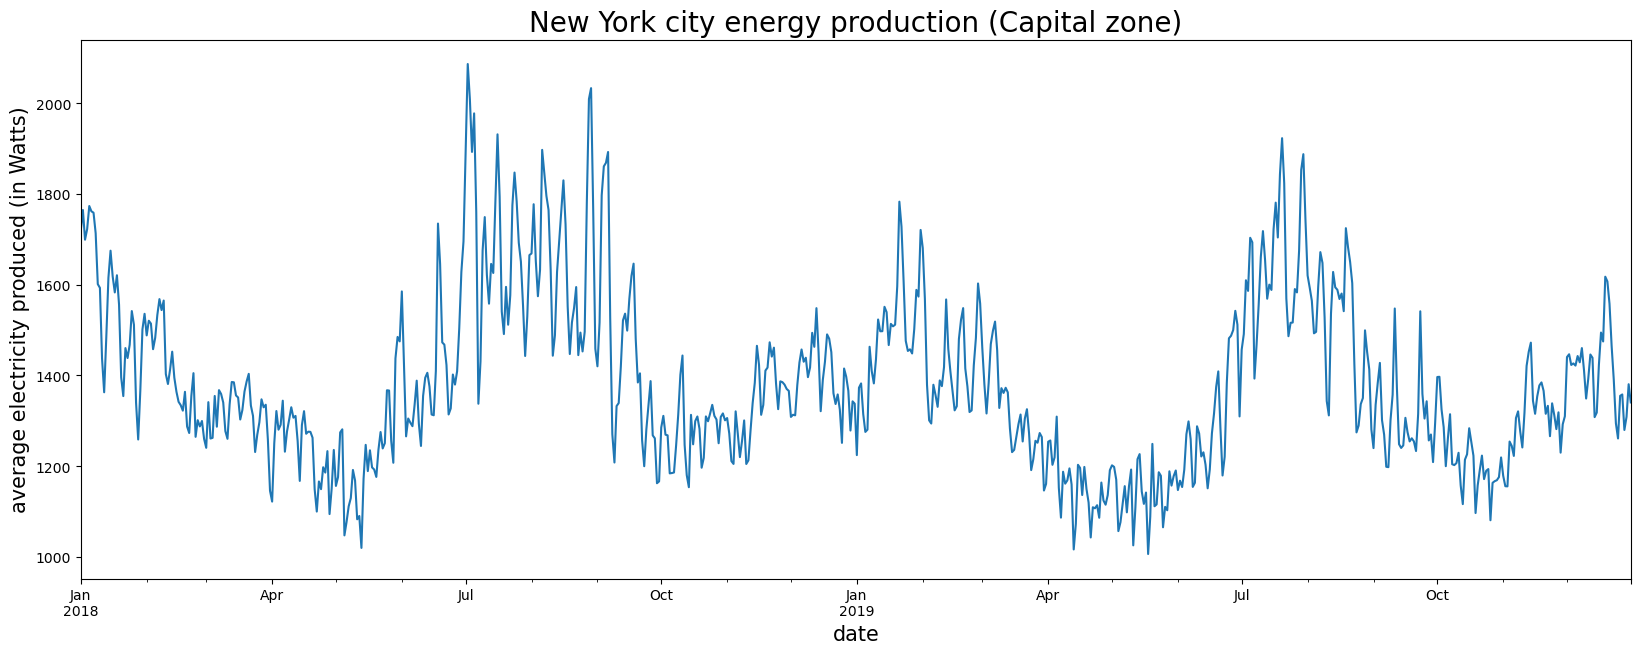

In [4]:
fig, ax = plt.subplots(figsize=(20,7))
data.LOAD.plot(ax=ax)
ax.set_title('New York city energy production (Capital zone)',fontsize=20)
ax.set_ylabel('average electricity produced (in Watts)', fontsize=15)
ax.set_xlabel('date', fontsize=15)

**Part 2:** add new columns  indicating the day of the week, the month, and whether a given date is a holiday.

In [5]:
# add day of week and month columns
data['DAY'] = data.index.dayofweek
data['MONTH'] = data.index.month

# add holiday column
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=data.index.min(), end=data.index.max())
data['HOLIDAY'] = data.index.isin(holidays)

data.head()

,STATION,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,LOAD,DAY,MONTH,HOLIDAY
DATE,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,17.67,NaN,0.00,0.0,0.0,12,18,7,310,310.0,29.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1719.182034,0,1,True
2018-01-02,USW00094789,15.66,NaN,0.00,0.0,0.0,18,26,13,260,270.0,23.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.714815,1,1,False
2018-01-03,USW00094789,8.28,NaN,0.00,0.0,0.0,21,28,12,260,270.0,19.9,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699.275172,2,1,False
2018-01-04,USW00094789,28.19,NaN,0.49,8.0,1.2,25,29,19,340,330.0,44.1,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1722.843750,3,1,False
2018-01-05,USW00094789,25.05,NaN,0.00,0.0,7.9,15,19,9,290,290.0,36.0,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1773.566997,4,1,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   AWND     730 non-null    float64
 2   PGTM     0 non-null      float64
 3   PRCP     730 non-null    float64
 4   SNOW     730 non-null    float64
 5   SNWD     730 non-null    float64
 6   TAVG     730 non-null    int64  
 7   TMAX     730 non-null    int64  
 8   TMIN     730 non-null    int64  
 9   WDF2     730 non-null    int64  
 10  WDF5     724 non-null    float64
 11  WSF2     730 non-null    float64
 12  WSF5     724 non-null    float64
 13  WT01     321 non-null    float64
 14  WT02     64 non-null     float64
 15  WT03     63 non-null     float64
 16  WT04     15 non-null     float64
 17  WT05     1 non-null      float64
 18  WT06     9 non-null      float64
 19  WT08     17 non-null     float64
 20  WT09     3 non-null      float64
 2

In [7]:
# drop columns with more than 10% missing values
data = data.dropna(thresh=len(data)*0.9, axis=1)
data.head()

,STATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,LOAD,DAY,MONTH,HOLIDAY
DATE,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,17.67,0.00,0.0,0.0,12,18,7,310,310.0,29.1,34.0,1719.182034,0,1,True
2018-01-02,USW00094789,15.66,0.00,0.0,0.0,18,26,13,260,270.0,23.0,29.1,1764.714815,1,1,False
2018-01-03,USW00094789,8.28,0.00,0.0,0.0,21,28,12,260,270.0,19.9,23.0,1699.275172,2,1,False
2018-01-04,USW00094789,28.19,0.49,8.0,1.2,25,29,19,340,330.0,44.1,55.0,1722.843750,3,1,False
2018-01-05,USW00094789,25.05,0.00,0.0,7.9,15,19,9,290,290.0,36.0,46.1,1773.566997,4,1,False


**Part 3:** define the matrix X and the target vector y (column `LOAD`)

In [8]:
# feature matrix/target vector
X = data.drop(['LOAD'], axis=1)
y = data.LOAD

The **goal** is to build a random forest pipeline that predicts the energy produced on a given day.
You'll train the regression model on the 2018 data, and test it on the 2019 data.

In [9]:
# training - test split
X_train = X[X.index.year==2018]
y_train = y[y.index.year==2018]
X_test = X[X.index.year==2019]
y_test = y[y.index.year==2019]

**Part 4:** Build a regression pipeline (feature preprocessor + random forest regression model). Then use a grid search to tune the pipeline hyperparameters.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   AWND     730 non-null    float64
 2   PRCP     730 non-null    float64
 3   SNOW     730 non-null    float64
 4   SNWD     730 non-null    float64
 5   TAVG     730 non-null    int64  
 6   TMAX     730 non-null    int64  
 7   TMIN     730 non-null    int64  
 8   WDF2     730 non-null    int64  
 9   WDF5     724 non-null    float64
 10  WSF2     730 non-null    float64
 11  WSF5     724 non-null    float64
 12  LOAD     730 non-null    float64
 13  DAY      730 non-null    int64  
 14  MONTH    730 non-null    int64  
 15  HOLIDAY  730 non-null    bool   
dtypes: bool(1), float64(8), int64(6), object(1)
memory usage: 92.0+ KB


In [20]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# categorical features
cat_features = ['DAY','MONTH','HOLIDAY']

# numerical features
num_features = ['AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [21]:
# grid search
param_grid = {
    'regressor__n_estimators': [100,200,300],
    'regressor__max_depth': [10,20,30]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'regressor__max_depth': 20, 'regressor__n_estimators': 100},
 0.1356417452629005)

**Part 5:** Test your model on the 2019 data. 
Plot the `y_test` vector and the prediction.

In [22]:
import numpy as np

In [23]:
# test set predictions
y_pred = best_model.predict(X_test)

# test set performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

90.21477476305918

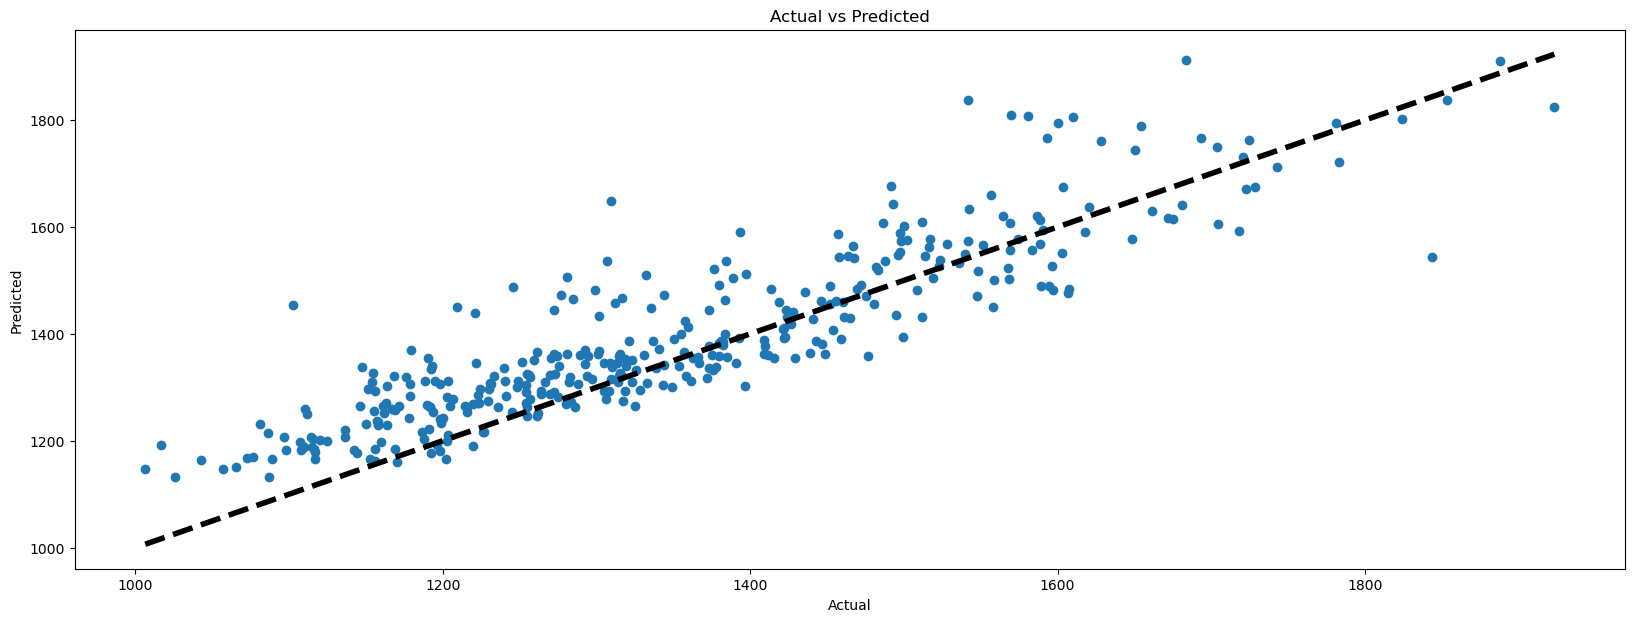

In [24]:
# plot y_test vs y_pred
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')
plt.show()